In [35]:
import keras
import keras_cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [36]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
        "yolo_v8_xs_backbone_coco"
    )
backbone.trainable = False

model = keras_cv.models.YOLOV8Detector(
    num_classes=33,
    bounding_box_format="xyxy",
    backbone=backbone,
    fpn_depth=1
)
model.summary()

Model: "yolov8_detector_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_5        │ [(None, None,     │  1,277,680 │ input_layer_5[0]… │
│ (Functional)        │ None, 64), (None, │            │                   │
│                     │ None, None, 128), │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_8 (Repeat)   │ (None, None,      │          0 │ functional_5[0][… │
│                     │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_9 (Repeat)   │ (None, None,      │          0 │ repeat_8[0][0]    │
│                     │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_39      │ (None, None,      │          0 │ repeat_9[0][0],   │
│ (Concatenate)       │ None, 384)        │            │ functional_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_co… │ (None, None,      │     49,152 │ concatenate_39[0… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_bn  │ (None, None,      │        512 │ pa_fpn_p4p5_pre_… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre     │ (None, None,      │          0 │ pa_fpn_p4p5_pre_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ split_20 (Split)    │ [(None, None,     │          0 │ pa_fpn_p4p5_pre[… │
│                     │ None, 64), (None, │            │                   │
│                     │ None, None, 64)]  │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │          0 │ split_20[0][1]    │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │     36,864 │ pa_fpn_p4p5_pre_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │        256 │ pa_fpn_p4p5_pre_… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_1 │ (None, None,      │          0 │ pa_fpn_p4p5_pre_… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │          0 │ pa_fpn_p4p5_pre_… │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │     36,864 │ pa_fpn_p4p5_pre_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 3,438,803 (13.12 MB)

 Trainable params: 2,154,979 (8.22 MB)

 Non-trainable params: 1,283,824 (4.90 MB)

In [ ]:
img = cv2.imread('../p2.jpg',1)
img = cv2.resize(img, (512, 512))
pred = model.predict(img[np.newaxis,:,:,:])
img1 = img.copy()
print(pred['confidence'].max())
for box in pred['boxes'][0, :10]:
    cv2.rectangle(img1, (box[:2].astype(int)), (box[2:]).astype(int), (255,0,0), 2)
plt.imshow(img1)
plt.axis('off')

In [38]:
with open('../data/prepared/words.txt') as f:
    texts = f.read().splitlines()[:-1]
print(texts)

['банальные', 'но', 'неопровержимые', 'выводы', 'также', 'тщательные', 'исследования', 'конкурентов', 'лишь', 'добавляют', 'фракционных', 'разногласий', 'и', 'обнародованы', 'каждый', 'из', 'нас', 'понимает', 'очевидную', 'вещь', 'перспективное', 'планирование', 'требует', 'анализа', 'дальнейших', 'направлений', 'развития', 'не', 'следует', 'однако', 'забывать', 'что', 'постоянное', 'информационно', 'пропагандистское', 'обеспечение', 'нашей', 'деятельности', 'требует', 'анализа', 'стандартных', 'подходов']


In [39]:
num_figs = len(texts)
max_bboxes = 5

In [40]:
captions_base = "Ё Й Ц У К Е Н Г Ш Щ З Х Ъ Ф Ы В А П Р О Л Д Ж Э Я Ч С М И Т Ь Б Ю".split(' ')
labels = []
for text in texts:
    letters = list(map(captions_base.index, text.upper()))
    if len(letters) < max_bboxes:
        letters += [-1] * (max_bboxes - len(letters))
    labels.append(letters[:max_bboxes])
# labels = np.array(labels)
# labels.shape

In [41]:
x_data = []
bb_data = []

for i in range(num_figs):
    filename = f'word_{i}'
    img = cv2.imread(f"../data/prepared/imgs/{filename}.jpg", 0)
    bboxes = pd.read_csv(f"../data/prepared/bboxes/{filename}.csv").values[:,1:].astype(int)
    # print(bboxes.shape)
    bboxes[:,2:] += bboxes[:,:2]
    bboxes=bboxes.tolist()
    if len(bboxes[0])<max_bboxes:
        bboxes+=[[-1,-1,-1,-1]]*(max_bboxes-len(bboxes))
    bboxes = np.array(bboxes[:max_bboxes])       

    x_data.append(img/255)
    bb_data.append(bboxes)#/([img.shape[1], img.shape[0]]*2))

    
x_data = np.array(x_data)
bb_data = np.array(bb_data).astype(int)

x_data.shape, bb_data.shape

((42, 32, 320), (42, 5, 4))

In [42]:
bb_data[0]

array([[ 7,  7, 22, 25],
       [24, 13, 36, 25],
       [37, 13, 51, 25],
       [52, 13, 63, 25],
       [80, 13, 91, 25]])

In [43]:
y_data = {
    "boxes": tf.constant(bb_data, dtype=tf.float32),
    "classes":tf.constant(labels, dtype=tf.int64)
}

In [44]:
y_data['boxes'].shape

TensorShape([42, 5, 4])

In [45]:
x_data.shape

(42, 32, 320)

In [46]:
x_data1 = np.stack([x_data[:,:,:, np.newaxis]]*3, axis=-1).reshape(x_data.shape+(3,))
x_data1.shape

(42, 32, 320, 3)

In [47]:
dataset = tf.data.Dataset.from_tensor_slices((x_data1, y_data))

In [55]:
optimizer = keras.optimizers.Adam(
    learning_rate=1e-4,
    global_clipnorm=10,
)

model.compile(
    classification_loss='binary_crossentropy',
    box_loss='ciou',
    optimizer=optimizer,
    jit_compile=False,
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 429ms/step - loss: 20.5219 - val_loss: 46.2651
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 21.9803 - val_loss: 41.1200
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 20.9699 - val_loss: 43.1354
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 21.5695 - val_loss: 41.4214
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 20.8000 - val_loss: 42.3774
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 21.1796 - val_loss: 41.4884
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 18.9346 - val_loss: 40.3655
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.4565 - val_loss: 39.5458
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 19.3423 - val_loss: 39.9277
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 18.5360 - val_loss: 39.5267
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17.2330 - val_loss: 34.6417
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17.

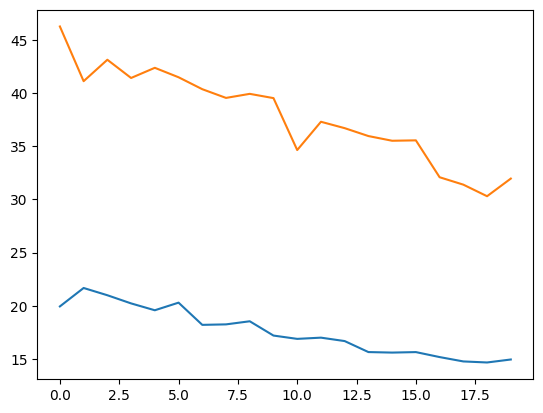

In [56]:
his = model.fit(x_data1, y_data, 
                batch_size=4, 
                validation_split=0.2,
                epochs=20)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


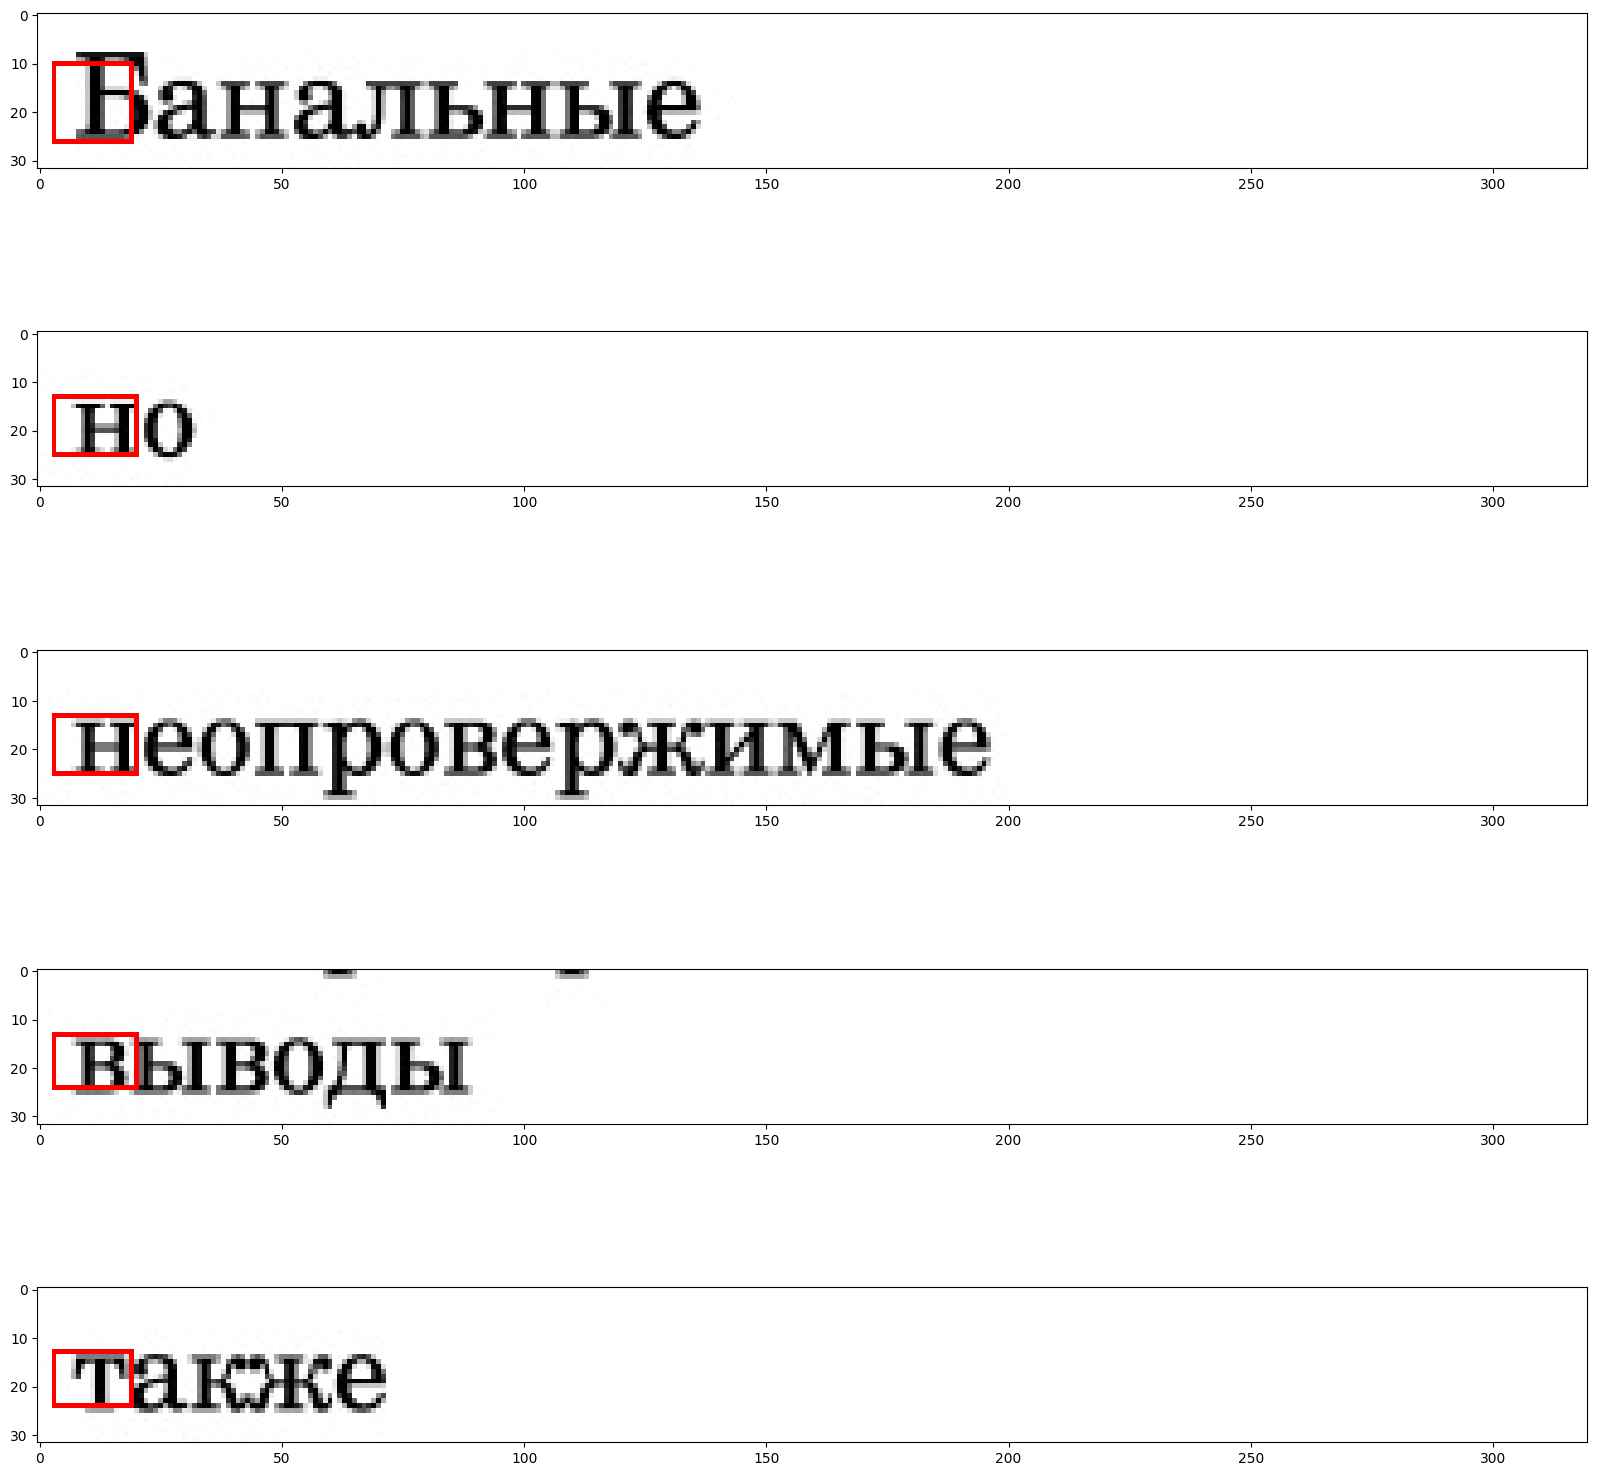

In [57]:
num_imgs = 5
test_imgs = x_data1[:num_imgs, :, :, :]
pred = model.predict(test_imgs)
fig, ax = plt.subplots(nrows=num_imgs, ncols=1, figsize=(20,20))
for i in range(num_imgs):
    img = test_imgs[i].copy()
    bboxes = pred['boxes'][i][pred['confidence'][i]>0]    
    for e, box in enumerate(bboxes):
        color = [0,0,0]
        color[e%3]+=255
        cv2.rectangle(img, (box[:2].astype(int)), (box[2:]).astype(int), color, 1)
    ax[i].imshow(img)

In [58]:
pred['boxes'][0]

array([[ 3.9638376, 10.8858385, 19.05711  , 26.628548 ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       , -1.       , -1.       ],
       [-1.       , -1.       ,